In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

MNIST Dataset is very famous Dataset that's why included as a Built-in Dataset in Keras

In [21]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Actual data is not in form of images, this data is form of pixels

In [23]:
X_train.shape 
# This is a 3D array
# we have 60000 Images and 28, 28 is pixels

(60000, 28, 28)

In [26]:
X_train[0].shape

# we can see 1st image of pixels value

(28, 28)

In [27]:
X_test.shape

# X_test also 3D array
# we have 10000 images of data in X-test

(10000, 28, 28)

In [4]:
y_train

# In y_train we have labels
# we can see in 1st images in X_train we have 5, 2nd we have and 3rd we have 4 and so on.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

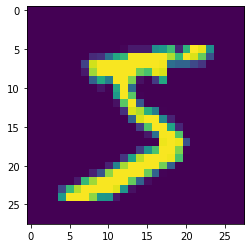

In [28]:
# now we convert pixels value into the image

import matplotlib.pyplot as plt
plt.imshow(X_train[0]) # in imshow we pass X_train of 0 item of data.

In [7]:
X_train[0] 
# take any image and see the value is 0 to 255.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
# now we have convert the array between range of 0 to 1.
'''why are coverting 0 to 1, 
whenever you train nerual network values in similar range you get faster weight
and convergens goes faster.'''
# Is very very imp data have similier range.
# now will all value is divide with max value with 255. 
# whats gonna happen all values comes 0 to 1 range.

X_train = X_train/255
X_test = X_test/255

In [30]:
X_train[0]
# Now we can see over comes range under 0 to 1.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
# Now time to build artificial NN 
# now we start with keras Sequential model
model = Sequential()

# we add layers in Sequential model
model.add(Flatten(input_shape=(28,28))) # Flatten converts higherD array to 1D.
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))# relu perform better in hidden layers.
model.add(Dense(10,activation='softmax'))# Whenever we have 1 or more nodes in output layers then we use softmax.

In [9]:
model.summary()
# we can see in flatten layer we dont have trainable parameter.
# FLatten simipliy converting HD into 1D.
''' Now, you can see in 1st we have 100480 parameters.
(imputs = 784 goes into 128 nodes = 100352 + 128 biases)'''
# Simiarily to remaining layers perform.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
# In SCC we don't need to one hot encode to labels SCC alredy do.

In [11]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2741 - accuracy: 0.9213 - val_loss: 0.1384 - val_accuracy: 0.9603
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1181 - accuracy: 0.9643 - val_loss: 0.1054 - val_accuracy: 0.9670
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0796 - accuracy: 0.9757 - val_loss: 0.1126 - val_accuracy: 0.9651
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0608 - accuracy: 0.9807 - val_loss: 0.0911 - val_accuracy: 0.9721
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0969 - val_accuracy: 0.9736
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0951 - val_accuracy: 0.9734
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0969 - val_accuracy:

In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_pred = y_prob.argmax(axis=1)# now to which index position we have max value

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9779

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



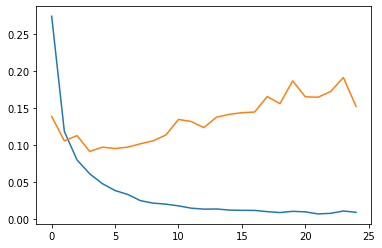

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

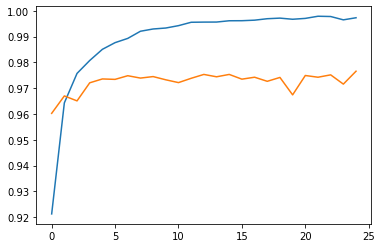

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

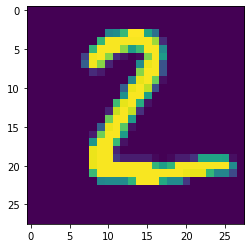

In [18]:
plt.imshow(X_test[1])

In [19]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 17ms/step


array([2], dtype=int64)